## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Membuat model regresi menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.

## Problem Statements
- Meload dataset Lyft dan Uber
- Mengidentifikasi fitur/kolom yang kiranya berkaitan terhadap price
- Mengidentifikasi distribusi fitur-fitur pada dataset
- Menghandle missing value dan outlier
- Mempreprocess data sebelum proses training
- Mengevaluasi model
- Merekayasa dan menyiapkan data inference


## Library

In [4]:
# import library yang dibutuhkan
import joblib
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from feature_engine.outliers import Winsorizer

## Data Loading

In [5]:
# set max display column
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [6]:
df = pd.read_csv("rideshare_kaggle.csv")

In [7]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
#rename kolom/fitur
df.rename(columns={"name":"service_type","short_summary":"weather"},inplace=True)

In [9]:
cat_col = df.columns[df.dtypes=='object'].to_list() # fitur kategorical
cat_col

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'service_type',
 'weather',
 'long_summary',
 'icon']

Semua data kategorical sudah sesuai.

In [10]:
num_col = df.columns[df.dtypes!='object'].to_list() # fitur numerical
num_col

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

Semua data numerikal sudah sesuai

In [11]:
df.duplicated().sum()

0

Tidak ada data duplikat

## EDA

In [12]:
# EDA data numerikal
df[num_col].describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Sekilas fitur distance dan surge_multiplier memiliki distribusi normal karena nilai mean dan mediannya yang relatif dekat, sedangkan price cenderung skewed.

In [13]:
df['price'].describe() # target prediksi

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Untuk target prediksi yakni tarif perjalanan, terlihat nilai terkecil yakni 2.5 nilai median sebesar 13.5 dan nilai terbesar sebesar 97.5 dengan rata rata nilai sebesar 16.5

Text(0.5, 0.98, 'Distribusi Data')

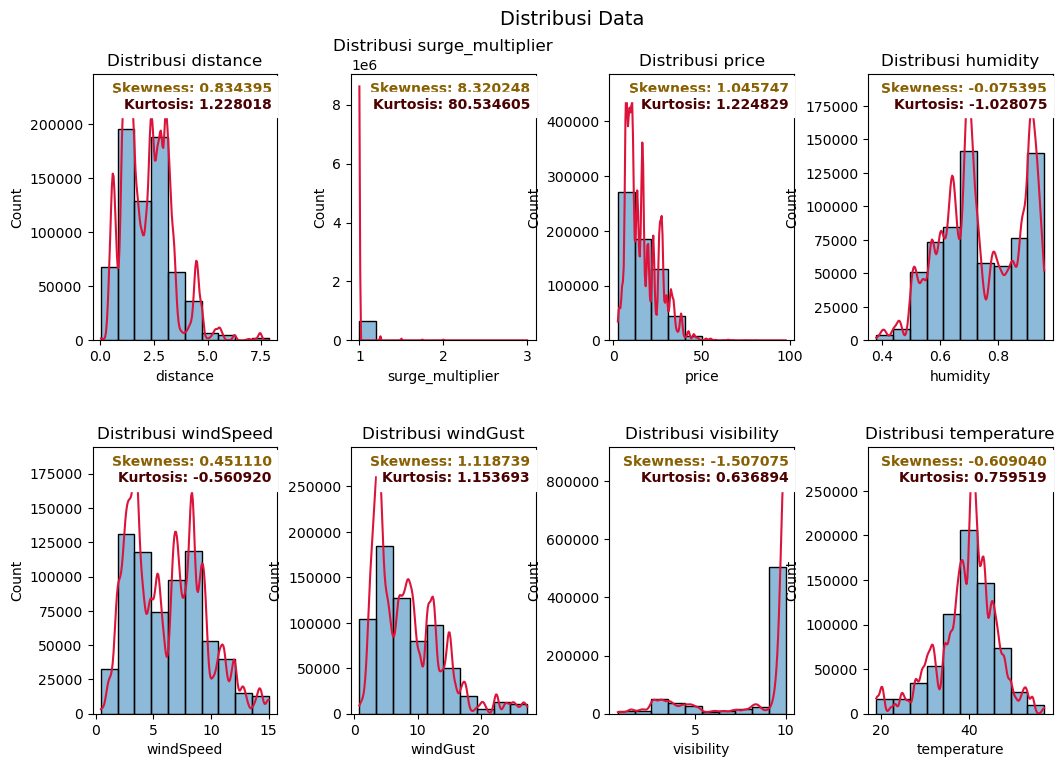

In [14]:
selected_num_col = ['distance','surge_multiplier','price','humidity','windSpeed','windGust','visibility','temperature']
titles = []
for i in range(len(selected_num_col)):
    titles.append('Distribusi ' + selected_num_col[i])
x=0
# plot distribusi fitur distance, surge_multiplier, dan price
fig, axes= plt.subplots(2,4, figsize=(12,8))


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(2):
    for j in range(4):
        sns.histplot(ax=axes[i][j], data=df[selected_num_col[x]], kde=True, bins=10)
        axes[i][j].set_title(titles[x])
        axes[i][j].lines[0].set_color('crimson')
        axes[i][j].text(x=0.97, y=0.97, transform=axes[i][j].transAxes, s="Skewness: %f" % df[selected_num_col[x]].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
        axes[i][j].text(x=0.97, y=0.91, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[selected_num_col[x]].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
        x+=1
fig.suptitle("Distribusi Data", fontsize=14)

humidity, windspeed, dan temperature tergolong simetris/terdistrbusi normal

In [15]:
# EDA data categorical
df[cat_col].describe()

,id,datetime,timezone,source,destination,cab_type,product_id,service_type,weather,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


Terdapat 9 jenis type cuaca yang didominasi oleh cuaca Overcast, 2 jenis type cab yaitu Uber dan Lyft, dan total 13 jenis service yang ditawarkan kedua platform.

In [16]:
df[cat_col].apply(pd.unique)

id              [424553bb-7174-41ea-aeb4-fe06d4f4b9d7, 4bd2305...
datetime        [2018-12-16 09:30:07, 2018-11-27 02:00:23, 201...
timezone                                       [America/New_York]
source          [Haymarket Square, Back Bay, North End, North ...
destination     [North Station, Northeastern University, West ...
cab_type                                             [Lyft, Uber]
product_id      [lyft_line, lyft_premier, lyft, lyft_luxsuv, l...
service_type    [Shared, Lux, Lyft, Lux Black XL, Lyft XL, Lux...
weather         [ Mostly Cloudy ,  Rain ,  Clear ,  Partly Clo...
long_summary    [ Rain throughout the day. ,  Rain until morni...
icon            [ partly-cloudy-night ,  rain ,  clear-night ,...
dtype: object

Text(0.5, 1.0, 'distance vs price')

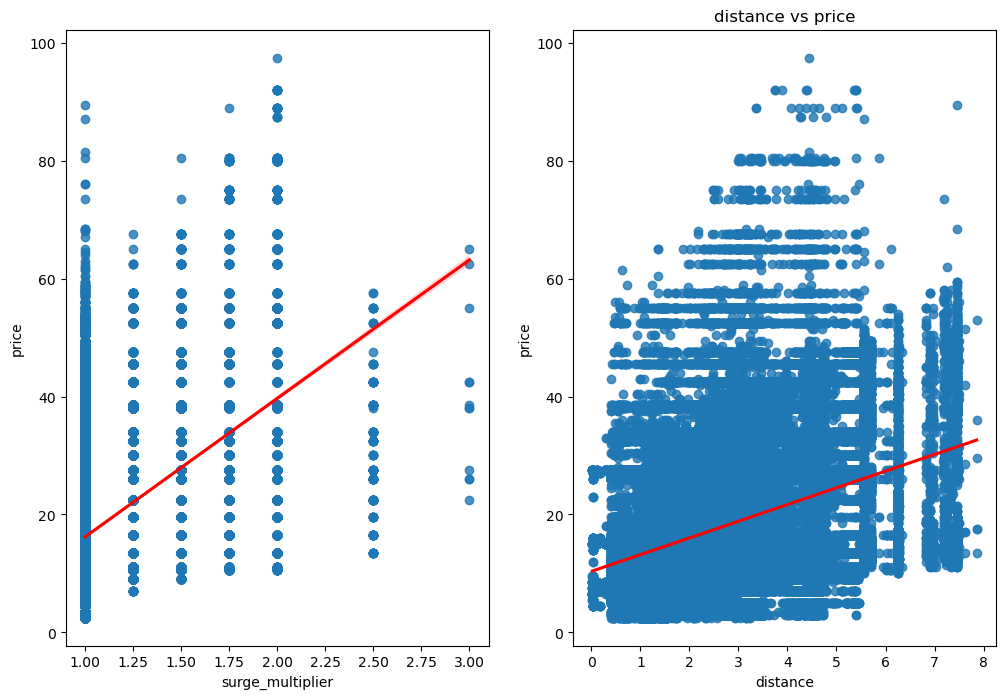

In [17]:
# plot hubungan surge_multiplier dan price
fig, axes= plt.subplots(1,2, figsize=(12,8))

sns.regplot(ax=axes[0], x='surge_multiplier',y='price', data=df, line_kws={'color':'red'})
axes[1].set_title('surge_multiplier vs price')
sns.regplot(ax=axes[1], x='distance',y='price', data=df, line_kws={'color':'red'})
axes[1].set_title('distance vs price')

Dari plot regresi belum terlihat jelas bagaimana hubungan 2 fitur tersebut dengan price.

## Data Preprocessing

In [18]:
# menetapkan data inference = data dengan price NaN
data_infer = df[df.price.isnull()]
data_infer.isnull().sum().sort_values(ascending=False).head()

price                      55095
id                             0
ozone                          0
temperatureLowTime             0
apparentTemperatureHigh        0
dtype: int64

Entri data yang memiliki missing price value akan digunakan untuk inference/prediksi nantinya, maka price tidak akan di imputasi.

In [19]:
# exclude data infer dari data train test
data_train_test = df.drop(index=data_infer.index)
data_train_test.isnull().sum().sort_values(ascending=False).head()

id                             0
temperatureHighTime            0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
dtype: int64

Data train & test sudah exclude dari data inference

In [20]:
# reset index data train & test
data_train_test.reset_index(drop=True, inplace=True)
data_infer.reset_index(drop=True, inplace=True)

### Train-Test Split

In [21]:
#split antara fitur dan target
X = data_train_test.drop('price',axis=1)
y = data_train_test['price']

In [22]:
X.shape

(637976, 56)

In [23]:
y.shape

(637976,)

In [24]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (510380, 56)
test size: (127596, 56)


## Feature Selection

In [25]:
df.corr().price.sort_values(ascending=False).head(5) # mencari data numerik yang relevan dengan price

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_52696/2952758343.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().price.sort_values(ascending=False).head(5) # mencari data numerik yang relevan dengan price


price               1.000000
distance            0.345061
surge_multiplier    0.240458
latitude            0.002088
visibility.1        0.001497
Name: price, dtype: float64

distance dan surge_multiplier memiliki korelasi yang relatif signifikan terhadap price.

In [26]:
df.corr().price.sort_values(ascending=False).tail(5) # mencari data numerik yang relevan dengan price

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_52696/4213013710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().price.sort_values(ascending=False).tail(5) # mencari data numerik yang relevan dengan price


day           -0.000722
humidity      -0.001238
windBearing   -0.001382
longitude     -0.001417
moonPhase     -0.001602
Name: price, dtype: float64

Sepertinya tidak ada fitur yang dapat menjadi perhatian untuk korelasi yang berbanding terbalik.

In [27]:
all_cat_col = df.columns[df.dtypes=='object'].to_list() # ambil fitur kategorical

In [28]:
df[all_cat_col]

,id,datetime,timezone,source,destination,cab_type,product_id,service_type,weather,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


Untuk cuaca sepertinya short summary sudah cukup merepresentasikan fitur icon dan long_summary. Source dan destination tidak saya pakai, karena data dilapangan bisa saja dari tempat yang benar benar baru. cab_type sepertinya bisa dipakai karena tarif kedua platform bisa saja berbeda. Saya sedikit mencari tahu tentang lyft_premier pada https://www.lyft.com/rider/premium dan menemukan bahwa Product_id  dan name rasanya penting untuk diperhitungkan, mengingat jenis kendaraan yang dipesan tentunya mempengaruhi tarif perjalanan. Namun, fitur keduanya merepresentasikan hal yang sama maka dari itu penulis memilih fitur name saja dengan pertimbangan kemudahan pengambilan konteks.

In [29]:
df[['cab_type','product_id','service_type']].value_counts() # fitur name merepresentasikan product_id

cab_type  product_id                            service_type
Uber      6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV       55096
          6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL          55096
          9a0e7b09-b92b-4c41-9779-2ad22b4d779d  WAV             55096
          6c84fd89-3f11-4782-9b50-97c468b19529  Black           55095
          8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi            55095
          55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX           55094
          997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool        55091
Lyft      lyft                                  Lyft            51235
          lyft_lux                              Lux Black       51235
          lyft_luxsuv                           Lux Black XL    51235
          lyft_plus                             Lyft XL         51235
          lyft_premier                          Lux             51235
          lyft_line                             Shared          51233
dtype: int64

Secara umum fitur yang akan digunakan meliputi fitur numerikal dan kategorical diantaranya:

In [30]:
# fitur numerikal (excluding price)
selected_num_col = ['distance','surge_multiplier']
selected_num_col

['distance', 'surge_multiplier']

In [31]:
# fitur categorical
selected_cat_col = ['cab_type','service_type','weather']
selected_cat_col

['cab_type', 'service_type', 'weather']

In [32]:
selected_features= selected_num_col + selected_cat_col # agregat fitur apa saja yang ingin digunakan dari tipe numerik dan kategorikal

In [33]:
X_train[selected_features] # menampilkan data frame dari fitur yang akan digunakan

,distance,surge_multiplier,cab_type,service_type,weather
130659,2.22,1.0,Uber,UberX,Light Rain
190997,3.22,1.0,Lyft,Lux Black XL,Mostly Cloudy
483204,1.63,1.0,Uber,Black SUV,Clear
579374,0.61,1.0,Lyft,Lux,Rain
4822,3.42,1.0,Uber,UberX,Possible Drizzle
...,...,...,...,...,...
110268,3.46,1.0,Lyft,Lux Black XL,Overcast
259178,2.12,1.0,Lyft,Lux Black XL,Overcast
365838,1.11,1.0,Uber,UberX,Mostly Cloudy
131932,0.65,1.0,Lyft,Shared,Mostly Cloudy


In [34]:
X_train[selected_features].isnull().sum() # cek missing values

distance            0
surge_multiplier    0
cab_type            0
service_type        0
weather             0
dtype: int64

In [35]:
# menampilkan data inference
data_infer = data_infer[selected_features]
data_infer

,distance,surge_multiplier,cab_type,service_type,weather
0,1.11,1.0,Uber,Taxi,Partly Cloudy
1,2.48,1.0,Uber,Taxi,Overcast
2,2.94,1.0,Uber,Taxi,Partly Cloudy
3,1.16,1.0,Uber,Taxi,Mostly Cloudy
4,2.67,1.0,Uber,Taxi,Clear
...,...,...,...,...,...
55090,2.50,1.0,Uber,Taxi,Mostly Cloudy
55091,0.91,1.0,Uber,Taxi,Mostly Cloudy
55092,1.79,1.0,Uber,Taxi,Mostly Cloudy
55093,1.61,1.0,Uber,Taxi,Overcast


In [36]:
# menampilkan data train
X_train = X_train[selected_features]
X_train

,distance,surge_multiplier,cab_type,service_type,weather
130659,2.22,1.0,Uber,UberX,Light Rain
190997,3.22,1.0,Lyft,Lux Black XL,Mostly Cloudy
483204,1.63,1.0,Uber,Black SUV,Clear
579374,0.61,1.0,Lyft,Lux,Rain
4822,3.42,1.0,Uber,UberX,Possible Drizzle
...,...,...,...,...,...
110268,3.46,1.0,Lyft,Lux Black XL,Overcast
259178,2.12,1.0,Lyft,Lux Black XL,Overcast
365838,1.11,1.0,Uber,UberX,Mostly Cloudy
131932,0.65,1.0,Lyft,Shared,Mostly Cloudy


In [37]:
# menampilkan data test
X_test = X_test[selected_features]
X_test

,distance,surge_multiplier,cab_type,service_type,weather
484718,4.51,1.0,Lyft,Shared,Overcast
466257,2.80,1.0,Uber,WAV,Rain
128490,1.09,1.0,Lyft,Lyft,Overcast
216568,0.92,1.0,Uber,Black,Rain
129302,1.12,1.0,Lyft,Lux Black,Mostly Cloudy
...,...,...,...,...,...
80425,2.67,1.0,Uber,Black SUV,Clear
102531,1.01,1.0,Lyft,Lyft,Partly Cloudy
185666,1.50,1.0,Uber,Black,Partly Cloudy
295269,1.97,1.0,Uber,UberPool,Overcast


## Handling Outlier

In [38]:
# fungsi untuk membuat histogram dan boxplot dari sebuah fitur
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [39]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

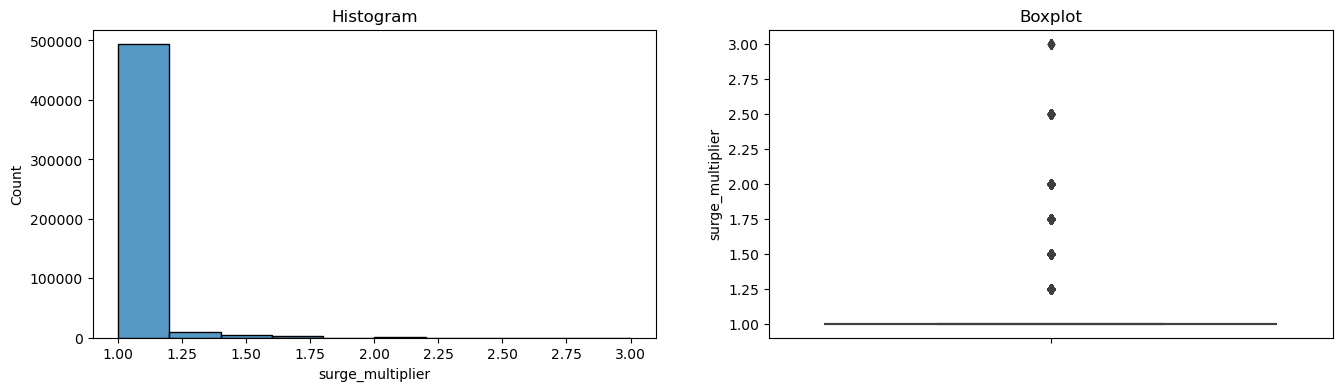


Skewness Value :  7.966922041424133


In [40]:
# plot distribusi data surge_multiplier dan juga boxplotnya untuk melihat outlier
diagnostic_plots(X_train, 'surge_multiplier')
print('\nSkewness Value : ', X_train['surge_multiplier'].skew())

In [41]:
upper_surge, lower_surge = find_skewed_boundaries(df=X_train, variable='surge_multiplier', distance=1.5)

In [42]:
upper_surge #upper limit outlier

1.0

In [43]:
lower_surge #lower limit outlier

1.0

In [44]:
num_surge_outlier = X_train.surge_multiplier[(X_train.surge_multiplier > upper_surge) | (X_train.surge_multiplier < lower_surge)].shape[0]
print(f'Percentage of outlier in surge_multiplier is {num_surge_outlier/X_train.shape[0]*100:.2f}%')

Percentage of outlier in surge_multiplier is 3.29%


Outlier surge terbilang relatif rendah

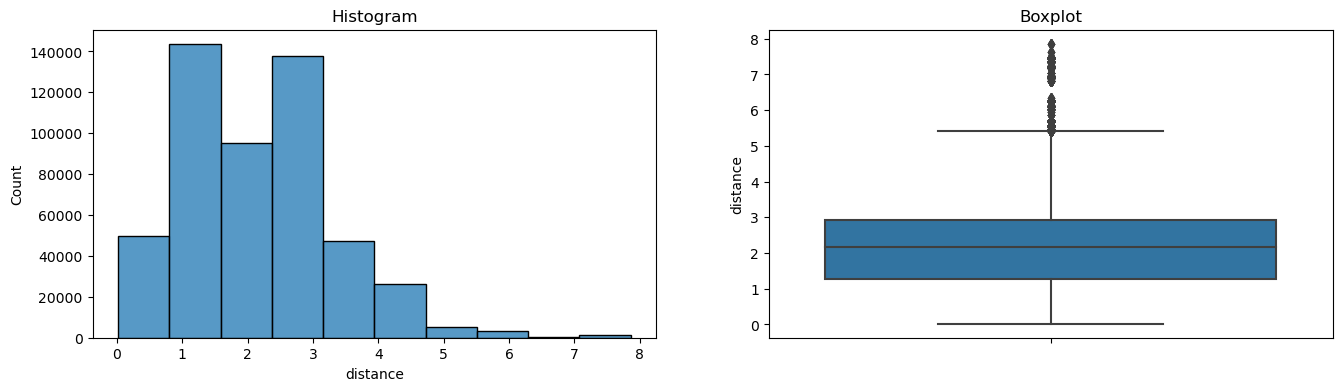


Skewness Value :  0.8180219737532629


In [45]:
# fitur distance sebelum dilakukan capping
diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

In [46]:
upper, lower = find_skewed_boundaries(df=X_train, variable='distance', distance=1.5)

In [47]:
num_distance_outlier = X_train.distance[(X_train.distance > upper) | (X_train.distance < lower)].shape[0]
print(f'Percentage of outlier in distance is {num_distance_outlier/X_train.shape[0]*100:.2f}%')

Percentage of outlier in distance is 1.04%


Outlier distance tergolong relatif rendah, keduanya memiliki skewness value > 0.5 yang artinya kedua fitur tidak terdistribusi normal dan condong ke kanan (right tailed). Meskipun persentase outlier terbilang relatif kecil dan bisa dilakukan trimming, kali ini saya akan menggunakan Winsorizer sebagai teknik capping dengan mereplace outlier dengan upper atau lower bound value distribusinya untuk mempertahakankan jumlah datanya sebanyak mungkin.<br><br>
*Notes*: Terjadi error pada winsorizer ketika menerima fitur surge_multiplier dengan alasan variasi nilai pada surge_multiplier terlalu kecil. Penulis disini berasumsi bahwa surge multiplier adalah faktor pengali ketika lonjakan permintaan pengguna layanan platform terjadi. Menurut distribusi data, hal ini jarang terjadi meskipun ada. Juga fakta bahwa kedua upper dan lower bound dari surge_multiplier ini adalah 1.0 maka apabila melalukan replace semua value akan seragam 1.0 semua (termasuk yang non outlier juga sudah memiliki nilai 1.0), hal ini menghilangkan insight dari fiturnya sendiri. maka penulis hanya akan melakukan scaling pada fitur ini dari data yang ada.

In [48]:
# Create the capper
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

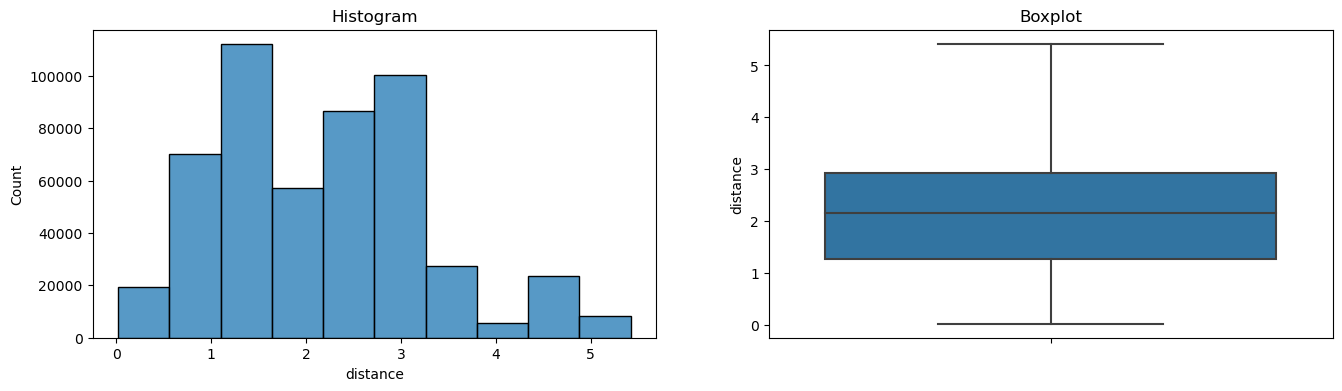


Skewness Value :  0.5880566092728312


In [49]:
# fitur distance setelah dilakukan capping
diagnostic_plots(X_train_t, 'distance')
print('\nSkewness Value : ', X_train_t['distance'].skew())

Distribusi sudah lebih normal dan outlier sudah tidak ada.

## Encoding

Teknik encoding yang penulis akan lakukan adalah dengan menggunakan one-hot encoding, dengan pertimbangan ketiga fitur kategorical tidak memiliki hirarki/orde tertentu. Ada satu fitur yang memungkinkan dilakukan ordinal encoding yakni service_type dimana terdapat tipe layanan yang lebih premium pastinya, namun karena ada 2 platform yakni Uber dan Lyft penulis tidak bisa memastikan tipe service mana yang lebih unggul secara hirarkis diantara platform yang berbeda.

In [50]:
X_train[selected_cat_col].describe()

,cab_type,service_type,weather
count,510380,510380,510380
unique,2,12,9
top,Uber,UberPool,Overcast
freq,264311,44136,161359


Terdapat total 23 unique values dari semua fitur kategorikal yang nantinya akan jadi kolom/fitur setelah one-hot encoding

### One-hot Enconding

In [51]:
enc= OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_copy = X_train_t.copy()
X_train_ohe= enc.fit_transform(X_train_copy[selected_cat_col])
X_train_ohe

/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [52]:
X_train_ohe.shape

(510380, 23)

23 fitur atau kolom telah terbentuk setelah encoding

In [53]:
# X_train
feature_names = enc.get_feature_names_out(input_features=selected_cat_col)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names)
X_train_ohe.head(3)

,cab_type_Lyft,cab_type_Uber,service_type_Black,service_type_Black SUV,service_type_Lux,service_type_Lux Black,service_type_Lux Black XL,service_type_Lyft,service_type_Lyft XL,service_type_Shared,service_type_UberPool,service_type_UberX,service_type_UberXL,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# X_test
X_test_ohe = enc.transform(X_test[selected_cat_col]) #transform only
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names)
X_test_ohe.head(3)

,cab_type_Lyft,cab_type_Uber,service_type_Black,service_type_Black SUV,service_type_Lux,service_type_Lux Black,service_type_Lux Black XL,service_type_Lyft,service_type_Lyft XL,service_type_Shared,service_type_UberPool,service_type_UberX,service_type_UberXL,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling

Scaling dilakukan pada data numerikal yang telah dilakukan outlier handling sebelumnya. Distribusi fitur distance sekarang telah condong menjadi normal (0.58 skewness), namun karena distribusi fitur surge_multiplier tidak dihandle dengan alasan yang sudah disebutkan sebelumnya, maka untuk amannya penulis menggunakan teknik MinMaxScaler atau normalisasi.

In [55]:
X_train_t[selected_num_col] # menampilkan fitur yang akan di scaling

,distance,surge_multiplier
130659,2.22,1.0
190997,3.22,1.0
483204,1.63,1.0
579374,0.61,1.0
4822,3.42,1.0
...,...,...
110268,3.46,1.0
259178,2.12,1.0
365838,1.11,1.0
131932,0.65,1.0


In [56]:
# instansiasi scaler
mm_scaler= MinMaxScaler()

# melakukan min max scaling
X_train_t[selected_num_col]= mm_scaler.fit_transform(X_train_t[selected_num_col])
X_train_t.head(5)

,distance,surge_multiplier,cab_type,service_type,weather
130659,0.407407,0.0,Uber,UberX,Light Rain
190997,0.592593,0.0,Lyft,Lux Black XL,Mostly Cloudy
483204,0.298148,0.0,Uber,Black SUV,Clear
579374,0.109259,0.0,Lyft,Lux,Rain
4822,0.629630,0.0,Uber,UberX,Possible Drizzle


In [57]:
selected_num_col

['distance', 'surge_multiplier']

In [58]:
# X_test
X_test[selected_num_col]= mm_scaler.transform(X_test[selected_num_col]) #transform only
X_test.head()

,distance,surge_multiplier,cab_type,service_type,weather
484718,0.831481,0.0,Lyft,Shared,Overcast
466257,0.514815,0.0,Uber,WAV,Rain
128490,0.198148,0.0,Lyft,Lyft,Overcast
216568,0.166667,0.0,Uber,Black,Rain
129302,0.203704,0.0,Lyft,Lux Black,Mostly Cloudy


## Concatenate Numerical and Categorical Features

In [59]:
X_train_t.reset_index(drop=True, inplace=True) #reset index sebelum concat
X_test.reset_index(drop=True, inplace=True) #reset index sebelum concat

In [60]:
# X_train numerical
X_train_num = X_train_t.drop(columns=selected_cat_col) #drop kolom categorical yang belum di encode

# X_test numerical
X_test_num = X_test.drop(columns=selected_cat_col) #drop kolom categorical yang belum di encode

In [61]:
# X_train numeric+categorical
X_train_final = pd.concat([X_train_num,X_train_ohe],axis=1) # menggabungkan kolom numerical dengan kolom categorical yang sudah di encode

# X_test numeric+categorical
X_test_final = pd.concat([X_test_num,X_test_ohe],axis=1) # menggabungkan kolom numerical dengan kolom categorical yang sudah di encode

In [62]:
X_train_final #data train final dengan outlier handling + fit_transform()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,service_type_Black,service_type_Black SUV,service_type_Lux,service_type_Lux Black,service_type_Lux Black XL,service_type_Lyft,service_type_Lyft XL,service_type_Shared,service_type_UberPool,service_type_UberX,service_type_UberXL,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,0.407407,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.592593,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.298148,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.109259,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.629630,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.637037,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
510376,0.388889,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
510377,0.201852,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
510378,0.116667,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
X_test_final #data test final tanpa outlier handling & transform only

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,service_type_Black,service_type_Black SUV,service_type_Lux,service_type_Lux Black,service_type_Lux Black XL,service_type_Lyft,service_type_Lyft XL,service_type_Shared,service_type_UberPool,service_type_UberX,service_type_UberXL,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,0.831481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.514815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.198148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.166667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.203704,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127591,0.490741,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127592,0.183333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127593,0.274074,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127594,0.361111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model Definition
Model yang penulis gunakan adalah linear regression untuk memprediksi harga tarif perjalanan.<br> 
Kelebihan dari model ini adalah Mudah diimplementasi dan efisien dalam proses training namun kekurangannya adalah sensitif terhadap outlier dan asumsi hubungan yang linier antara variabel dependent dan independent 

In [64]:
model_lin_reg= LinearRegression()
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## Model Evaluation

In [65]:
print('------Train------')
y_train_pred = model_lin_reg.predict(X_train_final)
print('MAE:',mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))

------Train------
MAE: 1.7815188816934129
R2 Score: 0.9275851840415779


In [66]:
print('------Test------')
y_test_pred = model_lin_reg.predict(X_test_final)
print('MAE:',mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

------Test------
MAE: 1.7867692091206466
R2 Score: 0.9272543455588331


Penulis menggunakan MAE dengan alasan bahwa penulis ingin mengetahui margin of error yang absolut dan mudah di interpretasi. Kedua, fokus penulis bukan pada penekanan outliernya sehingga tidak pakai MSE yang lebih sensitif terhadap nilai outlier. Untuk R2 penulis menggunakannya untuk mengetahui seberapa terkait/representatif model yang telah dibuat terhadap target nya atau price.

Dari hasil MAE diatas terdapat margin of absolute error sebesar 1.78 untuk target price, mengacu pada data EDA dimana nilai terkecil yakni 2.5 nilai median sebesar 13.5 dan nilai terbesar sebesar 97.5 dengan rata rata nilai sebesar 16.5 untuk price, error sebesar 1.78 tergolong relatif kecil. Maka penulis simpulkan bahwa model ini termasuk good fit. Nilai R2 Score sebesar 0.92 juga mendukung pernyataan ini yang artinya model ini memiliki korelasi sebesar 92% terhadap data target atau price.

# Save Model

In [67]:
# save model
with open('model_lin_reg.pkl','wb') as file_1:
    joblib.dump(model_lin_reg,file_1)

with open('model_scaler.pkl','wb') as file_2:
    joblib.dump(mm_scaler,file_2)

with open('model_encoder.pkl','wb') as file_3:
    joblib.dump(enc,file_3)

with open('list_num_cols.txt','wb') as file_4:
    joblib.dump(selected_num_col,file_4)

with open('list_cat_cols.txt','wb') as file_5:
    joblib.dump(selected_cat_col,file_5)

# Construct Data Inference

In [68]:
data_infer #data inference sebelum feature engineering

,distance,surge_multiplier,cab_type,service_type,weather
0,1.11,1.0,Uber,Taxi,Partly Cloudy
1,2.48,1.0,Uber,Taxi,Overcast
2,2.94,1.0,Uber,Taxi,Partly Cloudy
3,1.16,1.0,Uber,Taxi,Mostly Cloudy
4,2.67,1.0,Uber,Taxi,Clear
...,...,...,...,...,...
55090,2.50,1.0,Uber,Taxi,Mostly Cloudy
55091,0.91,1.0,Uber,Taxi,Mostly Cloudy
55092,1.79,1.0,Uber,Taxi,Mostly Cloudy
55093,1.61,1.0,Uber,Taxi,Overcast


Value service_type tidak valid karena tipe kategorikal yang tidak terdapat pada train dan test, value perlu direplace nantinya

In [69]:
data_infer.shape[0] # menampilkan jumlah entri data infer

55095

Terdapat 55 rb baris data inference

In [70]:
# menampilkan jumlah unique value surge multiplier
surge_multiplier = X_train.surge_multiplier.unique().tolist()
surge_multiplier

[1.0, 2.0, 1.5, 1.25, 1.75, 2.5, 3.0]

Value surge_multiplier valid

In [71]:
cab_type = X_train.cab_type.unique().tolist()
cab_type

['Uber', 'Lyft']

Sebenarnya value cab_type valid namun karena value ini akan direplace dengan value sesuai service_type yang akan di generate nantinya.

# Data Inference Feature Engineering

In [72]:
# menampilkan service type yang valid untuk di inference
service_type = X_train.service_type.unique().tolist()
service_type

['UberX',
 'Lux Black XL',
 'Black SUV',
 'Lux',
 'UberPool',
 'Lyft XL',
 'UberXL',
 'Lux Black',
 'WAV',
 'Black',
 'Lyft',
 'Shared']

In [73]:
service_type_infer = [] # list kosong untuk menampung service_type valid yang akan di generate

In [74]:
# loop sesuai jumlah baris data infer
for i in range(data_infer.shape[0]):
    service = service_type[np.random.randint(0,12)] #0,12 adalah range untuk mengindeks valid service_type (13 jenis service yang valid)
    service_type_infer.append(service) # append ke list cell sebelumnya

In [75]:
data_infer.service_type = service_type_infer
data_infer.service_type #setelah di generate berdasarkan service_type yang valid scr random

0               Black
1                 Lux
2               UberX
3              Shared
4        Lux Black XL
             ...     
55090             Lux
55091       Black SUV
55092             WAV
55093    Lux Black XL
55094            Lyft
Name: service_type, Length: 55095, dtype: object

In [76]:
lyft_service_type = X_train.service_type[X_train.cab_type=='Lyft'].unique().tolist()
uber_service_type = X_train.service_type[X_train.cab_type=='Uber'].unique().tolist()

In [77]:
lyft_service_type

['Lux Black XL', 'Lux', 'Lyft XL', 'Lux Black', 'Lyft', 'Shared']

In [78]:
uber_service_type

['UberX', 'Black SUV', 'UberPool', 'UberXL', 'WAV', 'Black']

In [79]:
'''''
Saat ini semua value cab_type adalah Uber maka harus disesuaikan dengan service type karena uber dan lyft punya jenis service yang berbeda
mereplace service_type juga berarti mereplace cab_type 'Uber' dengan 'Lyft' apabila service_type tidak mengandung kata 'Uber'
'''
data_infer.cab_type[data_infer.service_type.isin(lyft_service_type)] = 'Lyft'
data_infer.cab_type[data_infer.service_type.isin(uber_service_type)] = 'Uber'

/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_52696/2131500875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_infer.cab_type[data_infer.service_type.isin(lyft_service_type)] = 'Lyft'
/var/folders/lv/63lr74g926b4flfb_7npy3m40000gn/T/ipykernel_52696/2131500875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_infer.cab_type[data_infer.service_type.isin(uber_service_type)] = 'Uber'


In [80]:
data_infer # setelah feature engineering

,distance,surge_multiplier,cab_type,service_type,weather
0,1.11,1.0,Uber,Black,Partly Cloudy
1,2.48,1.0,Lyft,Lux,Overcast
2,2.94,1.0,Uber,UberX,Partly Cloudy
3,1.16,1.0,Lyft,Shared,Mostly Cloudy
4,2.67,1.0,Lyft,Lux Black XL,Clear
...,...,...,...,...,...
55090,2.50,1.0,Lyft,Lux,Mostly Cloudy
55091,0.91,1.0,Uber,Black SUV,Mostly Cloudy
55092,1.79,1.0,Uber,WAV,Mostly Cloudy
55093,1.61,1.0,Lyft,Lux Black XL,Overcast


cab_type dan service_type sudah valid dengan values bervariasi

# Save Data Inference

In [81]:
data_infer.to_csv('p1g1_infer.csv')

# Kesimpulan
- Dengan acuan nilai rata rata price 16.5, model yang dihasilkan memiliki error yang relatif kecil sebesar 1.78 (MAE)
- Model yang dihasilkan merepresentasikan prediksi harga dengan baik (R2 score 0.92 atau 92%).
- Fitur surge_multiplier, distance, cab_type, service_type, dan weather dapat menjelaskan tarif perjalanan kedua platform ride share.

# Further Improvement
- Peningkatan performa model dapat dilakukan dengan menambah fitur terkait lainnya menggunakan teknik seperti variance inflation factor (VIF)

# Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
>- Linearity: Hubungan antara fitur dan target adalah linier (garis lurus).<br>
>- Homoscedasticity: Selisih nilai aktual dan prediksi memiliki variance yang sama pada semua nilai X (error pada scatterplot cenderung berpola garis lurus). <br>
>- Independence: Nilai antar fitur/observasi tidak bergantung pada fitur dengan yang lain. <br>
>- Normality: Sebaran data pada fitur terdistribusi normal<br>

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

>- Masing-masing fitur (jumlah fitur setelah di encode) memiliki koefisien, dimana koefisien tersebut bermakna seberapa besar pengaruh fitur tersebut terhadap hasil prediksi. Semakin besar koefisien artinya semakin besar pula pengaruh fitur tersebut terhadap nilai predictionnya.<br><br>
>- Model intercept bermakna bahwa apabila semua nilai X atau fitur sama dengan nol, maka nilai prediksinya adalah nilai interceptnya. 

In [82]:
print("Model slope:    ", model_lin_reg.coef_)
print("Model intercept:", model_lin_reg.intercept_)

Model slope:     [ 1.55567434e+01  3.65895611e+01  4.96318605e+09 -7.09991427e+10
  3.34671908e+10  3.34671909e+10 -4.24951379e+10 -4.24951379e+10
 -4.24951379e+10 -4.24951379e+10 -4.24951379e+10 -4.24951379e+10
  3.34671908e+10  3.34671908e+10  3.34671908e+10  3.34671908e+10
  5.65829424e+10  5.65829424e+10  5.65829424e+10  5.65829424e+10
  5.65829424e+10  5.65829424e+10  5.65829424e+10  5.65829424e+10
  5.65829424e+10]
Model intercept: -19050990567.894024


In [83]:
model_lin_reg.coef_.shape[0] # print jumlah koefisien

25